## Assignment 11

Using section 8.1 in Deep Learning with Python as a guide, implement an LSTM text generator. 
Train the model on the Enron corpus or a text source of your choice. Save the model and generate 
20 examples to the results directory of dsc650/assignments/assignment11/.

In [7]:
# Import libraries
import keras
import numpy as np

In [8]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
import tensorflow as tf
#Eimport pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler

import numpy as np

gpu_devices = tf.config.experimental.list_physical_devices('GPU')

if gpu_devices:
    print('Using GPU')
else:
    print('Using CPU')

Using GPU


In [9]:
# Identify path of file
path = 'TheReturnOfTheKing.txt'

In [10]:
# Convert data to lowercase
text = open(path).read().lower()#.strip("|").lower().split()

In [5]:
#"".join(sorted(set(text.lower())))

In [6]:
#tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
#tokenizer.fit_on_texts(text)

In [7]:
#max_id = len(tokenizer.word_index) # number of distinct characters
#dataset_size = tokenizer.document_count # total number of characters

In [8]:
#print(max_id, dataset_size)

In [9]:
#[encoded] = np.array(tokenizer.texts_to_sequences([text])) - 1
#train_size = dataset_size * 90 // 100
#dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])

In [10]:
#n_steps = 100
#window_length = n_steps + 1 # target = input shifted 1 character ahead
#dataset = dataset.window(window_length, shift=1, drop_remainder=True)

In [11]:
#dataset = dataset.flat_map(lambda window: window.batch(window_length))

In [12]:
#np.random.seed(42)
#tf.random.set_seed(42)

In [13]:
#batch_size = 32
#dataset = dataset.shuffle(10000).batch(batch_size)
#dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))

In [14]:
#dataset = dataset.map(
 #   lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))

In [15]:
#dataset = dataset.prefetch(1)

In [16]:
#for X_batch, Y_batch in dataset.take(1):
 #   print(X_batch.shape, Y_batch.shape)

In [11]:
# Review length
print('Corpus length:', len(text))

Corpus length: 99636


In [12]:
# Vectorizing sequences of characters

In [13]:
# Extracting sequences of 60 characters
maxlen = 60
# Sample a new sequence every three characters
step = 3
# Hold the extract sequences
sentences = []
# Hold the targets - the follow-up characters
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])

print('Number of sequences:', len(sentences))

Number of sequences: 33192


In [14]:
# List of unique characters in the corpus
chars = sorted(list(set(text)))

print('Unique characters:', len(chars))
# Dictionary that maps unique characters to their index in the list "chars"
char_indices = dict((char, chars.index(char)) for char in chars)

print('Vectorization...')

Unique characters: 55
Vectorization...


In [15]:
# One-hot encodes the characters into binary arrays
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [16]:
# Single-layer LSTM model for next-character prediction
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))

model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               94208     
                                                                 
 dense (Dense)               (None, 55)                7095      
                                                                 
Total params: 101,303
Trainable params: 101,303
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Model compilation configuration
from tensorflow import keras
from keras import optimizers

optimizer = keras.optimizers.RMSprop(learning_rate=0.01)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

In [18]:
# Function to sample the next character given the model's predictions
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [28]:
#history = model.fit(x, y, batch_size=128, epochs=5)
# Text-generation loop
import random
import sys

# Train the model for 20 epochs
model.fit(x, y, batch_size=128, epochs=60)
    
for epoch in range(1, 2):
    
    print('epoch', epoch)
    
    # Fits the model for one iteration on the data
    
    
    # Selects a text seed at random
    
    start_index = random.randint(0, len(text) - maxlen - 1)
    generated_text = text[start_index: start_index + maxlen]
    
    print('--- Generating with seed: "' + generated_text + '"')
    # Tries a range or different sampling temperatures
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        sample(generated_text,temperature)
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)


Epoch 1/60
260/260 [==============================] - 5s 19ms/step - loss: 0.5108 - acc: 0.8427
Epoch 2/60
260/260 [==============================] - 4s 17ms/step - loss: 0.4936 - acc: 0.8471
Epoch 3/60
 10/260 [>.............................] - ETA: 4s - loss: 0.3979 - acc: 0.8859

KeyboardInterrupt: 

In [29]:
import sys
import numpy as np 
def generated_text_sample(sample_text, temperatures):
    gen_text = sample_text.lower()
    print('Generating text: "' + sample_text + '"')
    
    for temperature in temperatures:
        print('\n temperature:', temperature)
        sys.stdout.write(gen_text)
        for i in range(40):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(gen_text):
                sampled[0, t, char_indices[char]] =1
            pred = model.predict(sampled, verbose=0)[0]
            next_index = sample(pred, temperature)
            next_char = chars[next_index]
            gen_text += next_char
            gen_text = gen_text[1:]
            sys.stdout.write(next_char)
    
    

In [30]:
sample_text = 'He ran so ran into the wooods'
temp = [0.2, 0.5, 1.0, 1.2]

generated_text_sample(sample_text, temp)

Generating text: "He ran so ran into the wooods"

 temperature: 0.2
he ran so ran into the wooodsrrrrrrrgrerrrrerrrrrarerrrrrrrgrerarsrrr
 temperature: 0.5
rrrerrrrrarerrrrrrrgrerarsrrrsre rrulrrsreimrrsiarrrrri frrrr r rurrr
 temperature: 1.0
reimrrsiarrrrri frrrr r rurrrgprrlrr ses-bys gugi)aulmrrreeuypwlgeyru
 temperature: 1.2
-bys gugi)aulmrrreeuypwlgeyruicrdoe: rol uafw m.s rdr
uilrta ! 
'rdsf

In [26]:
import pandas as pd
histdf = pd.DataFrame(history.model.history.history)


In [27]:
model.save('lstm_model.h5')

In [42]:
histdf

,loss,acc
0,2.032332,0.465564
1,1.436255,0.602977
2,1.249795,0.648680
3,1.127655,0.677724
4,1.036383,0.698813


<AxesSubplot: xlabel='loss', ylabel='acc'>

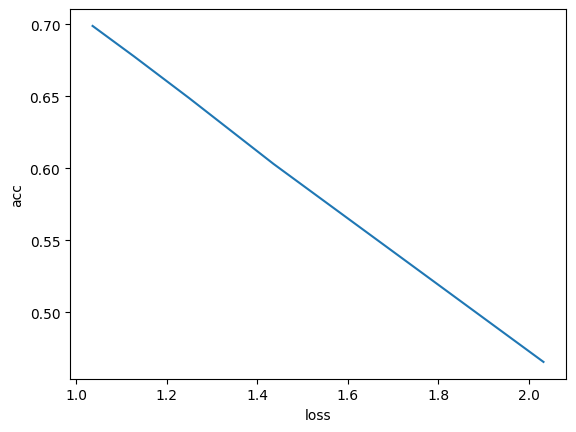

In [44]:
import matplotlib.pyplot as plt
sns.lineplot(histdf, x='loss', y='acc')


In [28]:
# Text-generation loop
import random
import sys

# Train the model for 20 epochs
#for epoch in range(1, 3):
 #   print('epoch', epoch)
    # Fits the model for one iteration on the data
  #  history = model.fit(x, y, batch_size=300, epochs=2)
    # Selects a text seed at random
   # start_index = random.randint(0, len(text) - maxlen - 1)
   # generated_text = text[start_index: start_index + maxlen]
    #print('--- Generating with seed: "' + generated_text + '"')
    # Tries a range or different sampling temperatures
    #for temperature in [0.2, 0.5, 1.0, 1.2]:
     #   print('------ temperature:', temperature)
      #  sys.stdout.write(generated_text)

In [29]:
for epoch in range(1, 60):
    print('epoch', epoch)
    model.fit(x, y, batch_size=128, epochs=1)
    start_index = random.randint(0, len(text) - maxlen - 1)
    generated_text = text[start_index: start_index + maxlen]
    print('--- Generating with seed: "' + generated_text + '"')
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)
        
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.
            
        preds = model.predict(sampled, verbose=0) [0]
        next_index = sample(preds, temperature)
        next_char = chars[next_index]
        
        generated_text += next_char
        generated_text = generated_text[1:]
        
        sys.stdout.write(next_char)

epoch 1
260/260 [==============================] - 4s 14ms/step - loss: 0.9529 - acc: 0.7225
--- Generating with seed: "evision - october, 2003 61
continued:


angle on: slow motio"
------ temperature: 0.2
evision - october, 2003 61
continued:


angle on: slow motio------ temperature: 0.5
evision - october, 2003 61
continued:


angle on: slow motio------ temperature: 1.0
evision - october, 2003 61
continued:


angle on: slow motio------ temperature: 1.2
evision - october, 2003 61
continued:


angle on: slow motion a 3 o datwaw, he
sundarate.
qeipsty vear, dorwaring saymorcued. gothe chalds . . . the sheefa.

                             final revision .           has, my lonk hrablits, vis
              no ans fight one murded me is my non. har batt up a godmy
             tvey?

come on: eowyn, golding leres . . . ithir slowing stratge .n.

they, loaff mount

nwend)
           wac
 fiman os widli hoby plepoch 2
260/260 [==============================] - 4s 14ms/step - loss: 0.8876 - a

KeyboardInterrupt: 

In [ ]:
sample_txt = 'He is tall and handsome'
temperatures  = [1.0, 1.2]

In [ ]:
gener(sample_txt, temperatures)

In [ ]:
templist = [0.5]

for i in range(1, 21):
    print(f'\n Sample Text#{i}')
    #generate_text_random_seed(templist)